In [5]:
## Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


In [6]:
## Load dataset and displays first two rows
df=pd.read_csv("D:/company_data.csv")
print(df.head(2))

   Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  


In [11]:
## Info of data
df.info
df.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [13]:
## Convert sales to target variables
df['Sales_Category'] = pd.cut(df['Sales'], bins=[0, 50, 100, 150, 200], labels=['Low', 'Medium', 'High', 'Very High'])


In [15]:
le = LabelEncoder()

# Encode the 'Sales_Category' column
df['Sales_Category'] = le.fit_transform(df['Sales_Category'])


In [17]:
# One-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, columns=['ShelveLoc', 'Urban', 'US'], drop_first=True)


In [19]:
# Check the data types to confirm all categorical variables are encoded
df_encoded.dtypes

Sales               float64
CompPrice             int64
Income                int64
Advertising           int64
Population            int64
Price                 int64
Age                   int64
Education             int64
Sales_Category        int32
ShelveLoc_Good         bool
ShelveLoc_Medium       bool
Urban_Yes              bool
US_Yes                 bool
dtype: object

### Exploratory Data Analtsis

In [21]:
## data cleaning
df.isnull().sum()

Sales             0
CompPrice         0
Income            0
Advertising       0
Population        0
Price             0
ShelveLoc         0
Age               0
Education         0
Urban             0
US                0
Sales_Category    0
dtype: int64

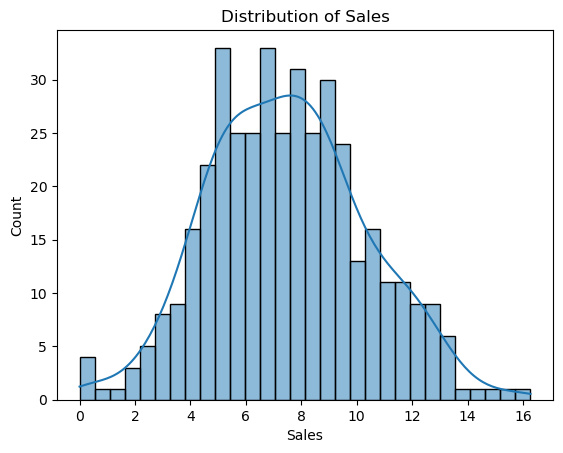

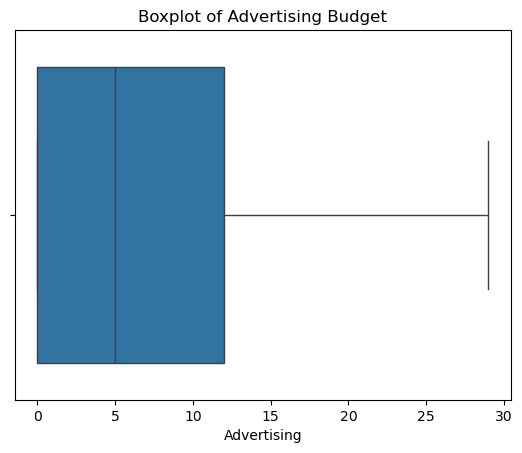

In [52]:
# Histogram for Sales
sns.histplot(df['Sales'], bins=30, kde=True)
plt.title('Distribution of Sales')
plt.show()

# Boxplot for Advertising
sns.boxplot(x='Advertising', data=df)
plt.title('Boxplot of Advertising Budget')
plt.show()


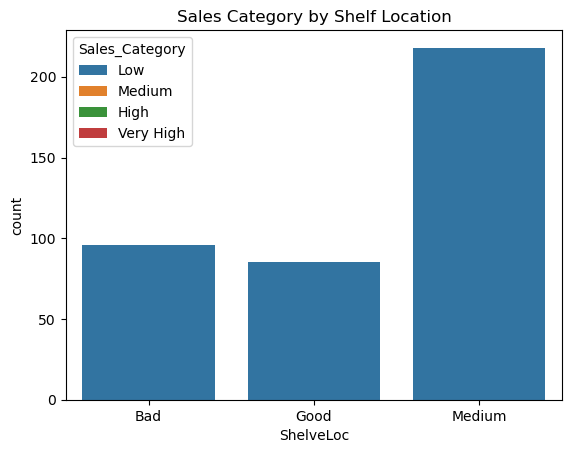

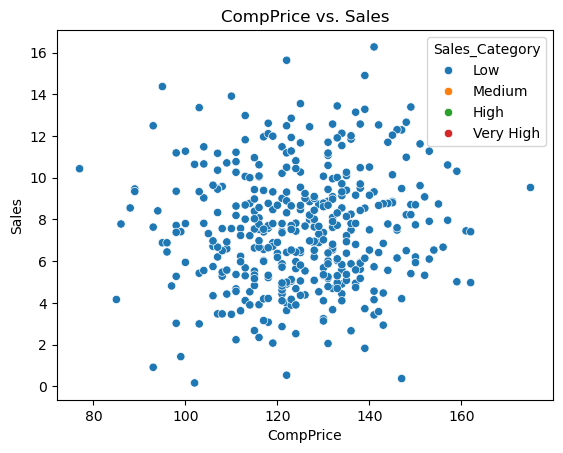

In [56]:
##Examine relationships between independent variables and sales categories.
### Countplot for Sales Category vs. Shelf Location

sns.countplot(x='ShelveLoc', hue='Sales_Category', data=df)
plt.title('Sales Category by Shelf Location')
plt.show()

# Scatter plot for Price vs. Sales
sns.scatterplot(x='CompPrice', y='Sales', data=df, hue='Sales_Category')
plt.title('CompPrice vs. Sales')
plt.show()


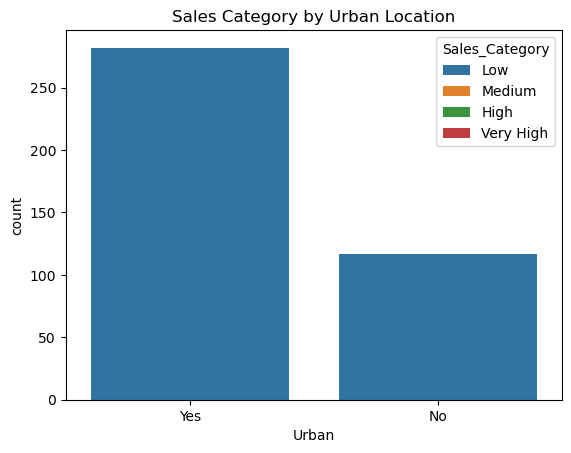

In [58]:
# Countplot for Urban vs. Sales Category
sns.countplot(x='Urban', hue='Sales_Category', data=df)
plt.title('Sales Category by Urban Location')
plt.show()


In [93]:
# Calculate the correlation matrix
correlation_matrix = df_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
